In [32]:
from tensorflow.python.client import device_lib

print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"


print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13333556 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16930581256357200971
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14698633084565493174
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15590732356401110497
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11150664704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14033414254049319044
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [33]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
pip install catboost

     |████████████████████████████████| 64.8MB 46kB/s 


In [119]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
from scipy.stats import norm, skew
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
import warnings
warnings.filterwarnings('ignore')

In [120]:
#READING#
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
master=pd.concat([train,test],ignore_index=True)
print(master.shape,train.shape,test.shape)
master.head()

(59928, 4) (48120, 4) (11808, 3)


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15.0,20151101001
1,2015-11-01 01:00:00,1,13.0,20151101011
2,2015-11-01 02:00:00,1,10.0,20151101021
3,2015-11-01 03:00:00,1,7.0,20151101031
4,2015-11-01 04:00:00,1,9.0,20151101041


In [60]:
#NA
master.isnull().sum()/len(master)*100

DateTime     0.000000
Junction     0.000000
Vehicles    19.703644
ID           0.000000
dtype: float64

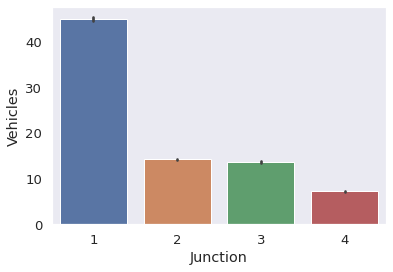

In [75]:
#MULTIVARIATE#
sns.set_style('dark')
sns.barplot(x='Junction',y='Vehicles',data=master)

In [107]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59928 entries, 0 to 59927
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DateTime          59928 non-null  object 
 1   Junction          59928 non-null  int64  
 2   Vehicles          48120 non-null  float64
 3   ID                59928 non-null  int64  
 4   Year              59928 non-null  int64  
 5   Month             59928 non-null  int64  
 6   Day               59928 non-null  int64  
 7   Dayofweek         59928 non-null  int64  
 8   DayOfyear         59928 non-null  int64  
 9   Week              59928 non-null  int64  
 10  Quarter           59928 non-null  int64  
 11  Is_month_start    59928 non-null  bool   
 12  Is_month_end      59928 non-null  bool   
 13  Is_quarter_start  59928 non-null  bool   
 14  Is_quarter_end    59928 non-null  bool   
 15  Is_year_start     59928 non-null  bool   
 16  Is_year_end       59928 non-null  bool  

In [122]:
import time
def date_feat(master):
  master['Year'] = pd.to_datetime(master['DateTime']).dt.year
  master['Month'] = pd.to_datetime(master['DateTime']).dt.month
  master['Day'] = pd.to_datetime(master['DateTime']).dt.day
  master['Dayofweek'] = pd.to_datetime(master['DateTime']).dt.dayofweek
  master['DayOfyear'] = pd.to_datetime(master['DateTime']).dt.dayofyear
  master['Weekofyear']=pd.to_datetime(master['DateTime']).dt.weekofyear
  master['WeekDay']=pd.to_datetime(master['DateTime']).dt.weekday
  master['Week'] = pd.to_datetime(master['DateTime']).dt.week
  master['Quarter'] = pd.to_datetime(master['DateTime']).dt.quarter 
  master['Is_month_start'] = pd.to_datetime(master['DateTime']).dt.is_month_start
  master['Is_month_end'] = pd.to_datetime(master['DateTime']).dt.is_month_end
  master['Is_quarter_start'] = pd.to_datetime(master['DateTime']).dt.is_quarter_start
  master['Is_quarter_end'] = pd.to_datetime(master['DateTime']).dt.is_quarter_end
  master['Is_year_start'] = pd.to_datetime(master['DateTime']).dt.is_year_start
  master['Is_year_end'] = pd.to_datetime(master['DateTime']).dt.is_year_end
  master['Semester'] = np.where(master['Quarter'].isin([1,2]),1,2)
  master['Is_weekend'] = np.where(master['Dayofweek'].isin([5,6]),1,0)
  master['Is_weekday'] = np.where(master['Dayofweek'].isin([0,1,2,3,4]),1,0)
  master['Days_in_month'] = pd.to_datetime(master['DateTime']).dt.days_in_month
  master['Hour'] = pd.to_datetime(master['DateTime']).dt.hour
  return master


master=date_feat(master)
master.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Day,Dayofweek,DayOfyear,Weekofyear,WeekDay,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekend,Is_weekday,Days_in_month,Hour
0,2015-11-01 00:00:00,1,15.0,20151101001,2015,11,1,6,305,44,6,44,4,True,False,False,False,False,False,2,1,0,30,0
1,2015-11-01 01:00:00,1,13.0,20151101011,2015,11,1,6,305,44,6,44,4,True,False,False,False,False,False,2,1,0,30,1
2,2015-11-01 02:00:00,1,10.0,20151101021,2015,11,1,6,305,44,6,44,4,True,False,False,False,False,False,2,1,0,30,2
3,2015-11-01 03:00:00,1,7.0,20151101031,2015,11,1,6,305,44,6,44,4,True,False,False,False,False,False,2,1,0,30,3
4,2015-11-01 04:00:00,1,9.0,20151101041,2015,11,1,6,305,44,6,44,4,True,False,False,False,False,False,2,1,0,30,4


In [109]:
cg=[]
for i in master.columns:
  if master[i].dtype=='bool':
    cg.append(i)

print('Category:',cg)   

le=LabelEncoder()
for i in cg:
  master[i]=le.fit_transform(master[i])

Category: ['Is_month_start', 'Is_month_end', 'Is_quarter_start', 'Is_quarter_end', 'Is_year_start', 'Is_year_end']


In [110]:
master.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekend,Is_weekday,Days_in_month,Hour
0,2015-11-01 00:00:00,1,15.0,20151101001,2015,11,1,6,305,44,4,1,0,0,0,0,0,2,1,0,30,0
1,2015-11-01 01:00:00,1,13.0,20151101011,2015,11,1,6,305,44,4,1,0,0,0,0,0,2,1,0,30,1
2,2015-11-01 02:00:00,1,10.0,20151101021,2015,11,1,6,305,44,4,1,0,0,0,0,0,2,1,0,30,2
3,2015-11-01 03:00:00,1,7.0,20151101031,2015,11,1,6,305,44,4,1,0,0,0,0,0,2,1,0,30,3
4,2015-11-01 04:00:00,1,9.0,20151101041,2015,11,1,6,305,44,4,1,0,0,0,0,0,2,1,0,30,4


Skew Dist: 0.18753542136230414
Kurtosis Dist: -0.4619617488135477


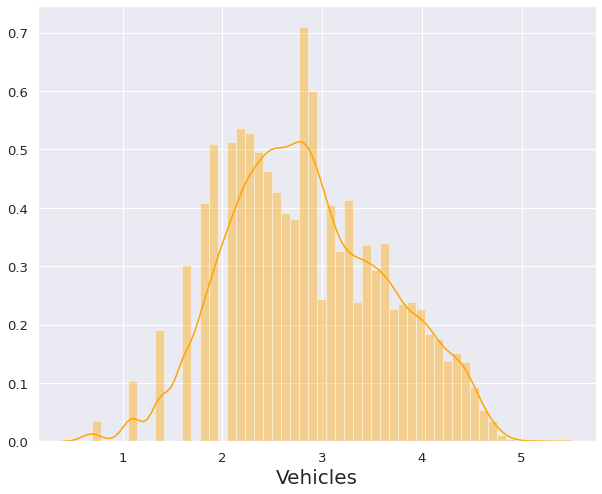

In [123]:
# SKEWED
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
master.Vehicles=np.log1p(master.Vehicles)
sns.distplot(master['Vehicles'],color='orange')
plt.xlabel('Vehicles',fontsize=20)
print('Skew Dist:',master['Vehicles'].skew())
print('Kurtosis Dist:',master['Vehicles'].kurt())
cd={'Is_month_start', 'Is_month_end', 'Is_quarter_start', 'Is_quarter_end', 'Is_year_start', 'Is_year_end','Junction'}

In [124]:
###MODEL BUILDING###
master=pd.get_dummies(master,columns=cd)
X=master[master['Vehicles'].isnull()!=True].drop(['Vehicles','ID','DateTime'],axis=1)
y=master[master['Vehicles'].isnull()!=True]['Vehicles']
X_test=master[master['Vehicles'].isnull()==True].drop(['Vehicles','ID','DateTime'],axis=1)
#SCALING
scaler = StandardScaler()
X=scaler.fit_transform(X)

#SPLITTING#
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [125]:
#MODEL SELEECTION#

mse=[]
ac=[]
rmse=[]
rsq=[]
md=[]
gd=[]


dt=DecisionTreeRegressor()
lr=LinearRegression()
rf=RandomForestRegressor()
knn=KNeighborsRegressor(n_neighbors = 39)
sv=SVR()
ada=AdaBoostRegressor()
gbm=GradientBoostingRegressor()
xgb=XGBRegressor()
cat=CatBoostRegressor(logging_level='Silent')
ls=Lasso()
rid=Ridge()
br=BayesianRidge()
et=ElasticNet()
hb= HuberRegressor()

models = [dt,lr,rf,knn,sv,ada,gbm,xgb,cat,ls,rid,br,et,hb]


for model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_val)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_val,y_val)
    ms=mean_squared_error(y_val, predictions)
    rms=np.sqrt(mean_squared_error(y_val,predictions))
    rs=r2_score(y_val,predictions)
    mse.append(ms)
    rmse.append(rms)
    rsq.append(rs)
    md.append(train_score)
    gd.append(test_score)
    
    
ensemble=pd.DataFrame({'names':['Decison Tree','Linear','Random forest','KNN',
                                'SVM','Adaboost','GBM','XGB','CATBOOST','LASSO','RIDGE',
                                'Bridge','Elastic Net','Huber'],
                      'R2':rsq,'MSE':mse,'RMSE':rmse,'Train Score':md,'Test Score':gd})
ensemble=ensemble.sort_values(by='R2',ascending=False).reset_index(drop=True)
ensemble    

[17:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,names,R2,MSE,RMSE,Train Score,Test Score
0,CATBOOST,0.932745,0.042214,0.205461,0.940558,0.932745
1,Random forest,0.931664,0.042892,0.207105,0.990292,0.931664
2,XGB,0.883440,0.073162,0.270484,0.882284,0.883440
3,GBM,0.882521,0.073738,0.271548,0.881262,0.882521
4,Decison Tree,0.882138,0.073979,0.271990,1.000000,0.882138
5,SVM,0.868697,0.082415,0.287081,0.870430,0.868697
6,KNN,0.864887,0.084807,0.291216,0.872379,0.864887
7,Linear,0.786951,0.133725,0.365685,0.785035,0.786951
8,RIDGE,0.786705,0.133880,0.365896,0.784931,0.786705
9,Bridge,0.786591,0.133952,0.365994,0.784862,0.786591
